In [21]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


In [22]:
df.head()

,label,message,spam,wordcount
0,ham,"Go until jurong point, crazy.. Available only ...",0,20
1,ham,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,ham,U dun say so early hor... U c already then say...,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13


In [23]:
df = pd.read_csv('spam.csv', encoding='latin1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df = df.rename(columns={"v1": "label","v2": "message"})
df = df.dropna() 
df.groupby('label').describe()
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['spam']=df['label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,label,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


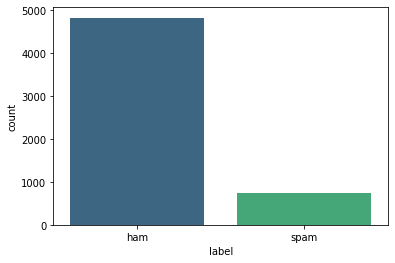

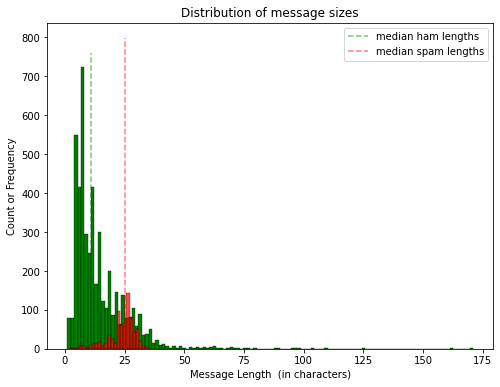

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
_=sns.countplot(data=df,x='label',palette='viridis')
df['wordcount'] = df['message'].str.split().str.len()
fig,ax=plt.subplots(figsize=(8,6))
check = 'ham'
sns.histplot(df[df['label']==check],x='wordcount',color='green',ax=ax,alpha=1)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=df.loc[df['label']==check,'wordcount'].median(),ymin=ymin,ymax=ymax,color='green',alpha=0.5,linestyles='dashed')

check = 'spam'
sns.histplot(df[df['label']==check],x='wordcount',color='red',ax=ax,alpha=0.7)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=df.loc[df['label']==check,'wordcount'].median(),ymin=ymin,ymax=ymax,color='red',alpha=0.5,linestyles='dashed')
plt.legend(['median ham lengths','median spam lengths'])
_=plt.title('Distribution of message sizes')
_=plt.ylabel('Count or Frequency')
_=plt.xlabel('Message Length  (in characters)')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.message,df.spam)

In [27]:
df.spam.value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9877961234745154

In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [32]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [33]:
ypred=clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1203
           1       0.97      0.94      0.95       190

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [35]:
clf.score(X_test,y_test)

0.9877961234745154

In [36]:
confusion_matrix(y_test,ypred)

array([[1197,    6],
       [  11,  179]])

In [37]:
from sklearn.metrics import roc_curve

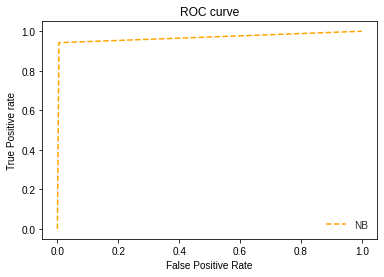

In [43]:
fpr1, tpr1, thresh1 = roc_curve(y_test, ypred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='NB')
plt.style.use('seaborn')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()